In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv('/content/cardekho_data.csv')

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(df)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Percentage of Missing Data:
 Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64


In [21]:
df.duplicated().sum()

2

In [22]:
df = df.drop_duplicates()

In [23]:
clean_df = df.dropna()

In [24]:
clean_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [25]:
# Removing Owner and car_namecolumn as it doesn't provide much value to us

clean_df = clean_df.drop(columns = ['Owner' , 'Car_Name'])

clean_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual


<ipython-input-26-9554a6a8ecd5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_df.corr(), annot=True, cmap='Greens')


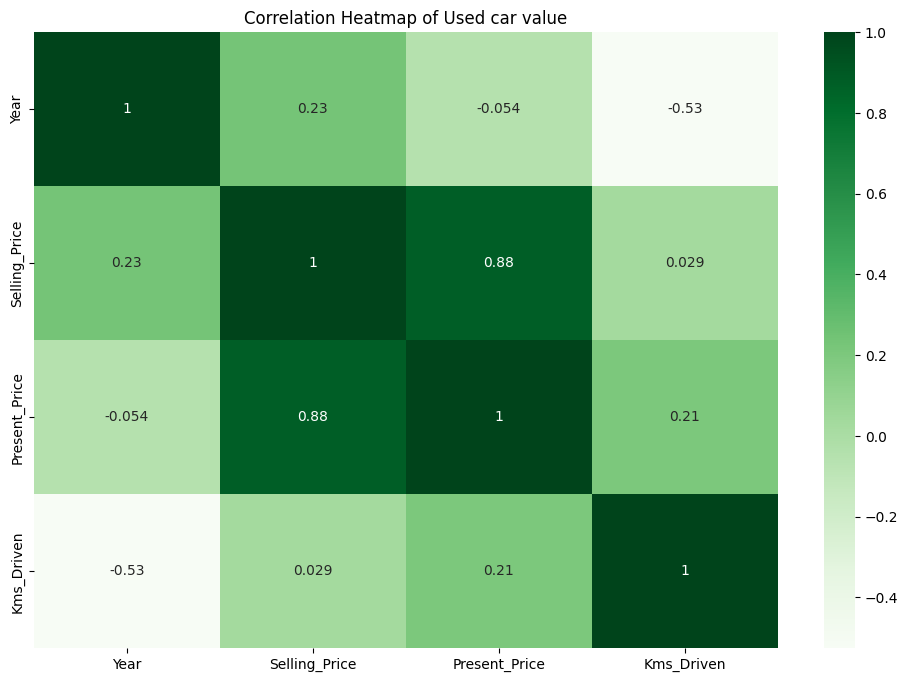

In [26]:
# Finding out the relations between the predictor variables and target variables using heatmap


plt.figure(figsize=(12, 8))
sns.heatmap(clean_df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Used car value')
plt.show()

As per the heatmap, the present_price is having a correlation for our target variable "Selling Price". However, we need to encode our categorical variables to get a clear picture!

In [27]:
clean_df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [28]:
# Seeing the categorical values and numerical values in our dataset

categorical = []
for col in clean_df.columns:
  if (clean_df[col].dtype == 'O'):
    categorical.append(col)
categorical

['Fuel_Type', 'Seller_Type', 'Transmission']

In [29]:
numerical = []
for col in clean_df.columns:
  if(clean_df[col].dtype != 'O'):
    numerical.append(col)
numerical

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']

In [30]:
clean_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [31]:
clean_df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [32]:
final_df = clean_df.copy()



In [33]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [34]:
# Encoding categorical variables

import pandas as pd

# Sample data
data = {
    "Seller_Type": ["Dealer", "Individual"],
    "Transmission": ["Manual", "Automatic"],
    "Fuel_Type": ["Petrol", "Diesel"]
}

# Create a DataFrame from the data
car_df = clean_df.copy()

# Define encoding functions (same as before)
def binary_encode(category):
  if category == "Dealer" or category == "Manual":
    return 0
  else:
    return 1

fuel_type_mapping = {"Petrol": 1, "Diesel": 2, "CNG": 3}

# Encode Seller_Type and Transmission (using apply)
car_df["Seller_Type_Encoded"] = car_df["Seller_Type"].apply(binary_encode)
car_df["Transmission_Encoded"] = car_df["Transmission"].apply(binary_encode)

# Encode Fuel_Type (using lookup)
car_df["Fuel_Type_Encoded"] = car_df["Fuel_Type"].replace(fuel_type_mapping)

# Remove original categorical columns
car_df.drop(columns=["Seller_Type", "Transmission", "Fuel_Type"], inplace=True)

# Print results (shows the encoded DataFrame)
print(car_df)



     Year  Selling_Price  Present_Price  Kms_Driven  Seller_Type_Encoded  \
0    2014           3.35           5.59       27000                    0   
1    2013           4.75           9.54       43000                    0   
2    2017           7.25           9.85        6900                    0   
3    2011           2.85           4.15        5200                    0   
4    2014           4.60           6.87       42450                    0   
..    ...            ...            ...         ...                  ...   
296  2016           9.50          11.60       33988                    0   
297  2015           4.00           5.90       60000                    0   
298  2009           3.35          11.00       87934                    0   
299  2017          11.50          12.50        9000                    0   
300  2016           5.30           5.90        5464                    0   

     Transmission_Encoded  Fuel_Type_Encoded  
0                       0               

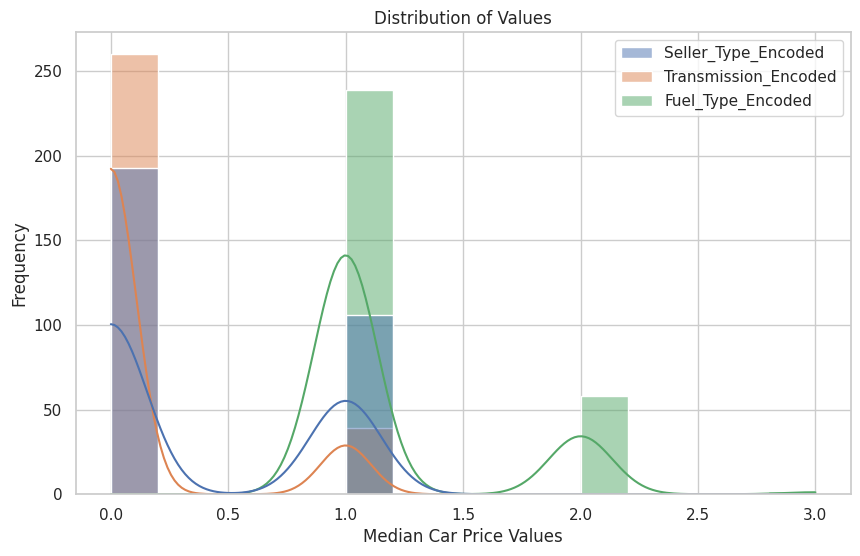

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(car_df[['Seller_Type_Encoded', 'Transmission_Encoded', 'Fuel_Type_Encoded']], color='forestgreen', kde=True)
plt.title('Distribution of Values')
plt.xlabel('Median Car Price Values')
plt.ylabel('Frequency')
plt.show()

 Corelation of values: 
                           Year  Selling_Price  Present_Price  Kms_Driven  \
Year                  1.000000       0.234369      -0.053563   -0.525714   
Selling_Price         0.234369       1.000000       0.876378    0.028566   
Present_Price        -0.053563       0.876378       1.000000    0.205253   
Kms_Driven           -0.525714       0.028566       0.205253    1.000000   
Seller_Type_Encoded  -0.036820      -0.553851      -0.511686   -0.101030   
Transmission_Encoded -0.003434       0.348869       0.334265    0.163881   
Fuel_Type_Encoded     0.046210       0.500292       0.431809    0.167287   

                      Seller_Type_Encoded  Transmission_Encoded  \
Year                            -0.036820             -0.003434   
Selling_Price                   -0.553851              0.348869   
Present_Price                   -0.511686              0.334265   
Kms_Driven                      -0.101030              0.163881   
Seller_Type_Encoded            

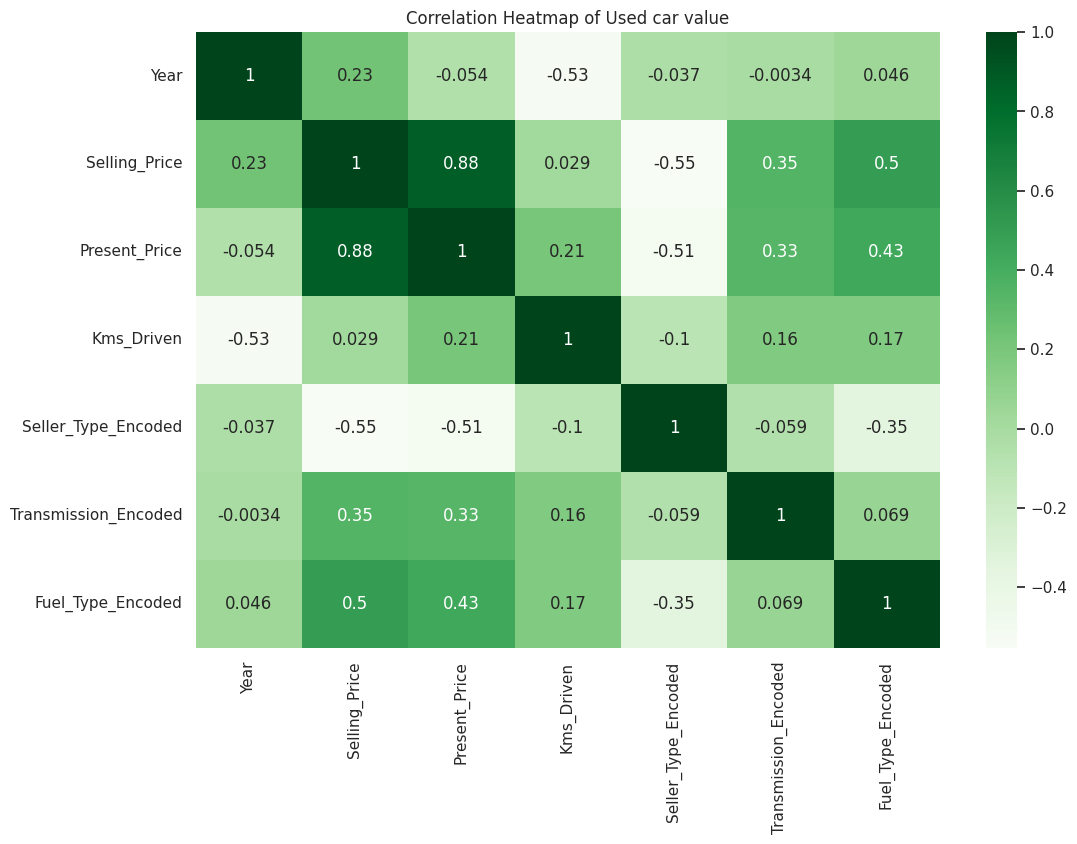

In [36]:
# Now checking the co-relation matrix
print(f" Corelation of values: \n {car_df.corr()}")

plt.figure(figsize=(12, 8))
sns.heatmap(car_df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Used car value')
plt.show()

After encoding the categorical values and looking at the heatmap, Present_Price still remains the top independent variable or predictor variable. Followed by, Fuel_Type encoded and Transmission encoded.

In [37]:
# Defining the features

features = ['Present_Price' , 'Fuel_Type_Encoded', 'Transmission_Encoded']

target = ['Selling_Price']

X = car_df[features]

y = car_df[target]

# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)


# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 239 samples
Test set size: 60 samples


# Training the model on linear model

In [38]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const

,const,Present_Price,Fuel_Type_Encoded,Transmission_Encoded
57,1.0,18.54,1,0
281,1.0,7.60,1,0
10,1.0,3.60,1,0
35,1.0,7.74,3,0
147,1.0,0.84,1,0
...,...,...,...,...
278,1.0,8.40,1,0
154,1.0,0.88,1,0
182,1.0,0.58,1,0
164,1.0,0.54,1,0


In [39]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     309.2
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.85e-81
Time:                        01:32:24   Log-Likelihood:                -522.96
No. Observations:                 239   AIC:                             1054.
Df Residuals:                     235   BIC:                             1068.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1178 

 **Prediction and Testing**

In [40]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

28      2.511454
95      8.782083
186     1.848755
16      7.376885
282     8.749921
158     1.052870
287     4.834362
84      8.518943
38      2.430184
1       6.842213
141     1.164082
88      3.409702
99     11.508827
199     1.069979
219     4.842622
71      8.099761
60      8.782083
218     4.842622
184     1.142695
69      9.765878
4       5.700154
23      2.301863
91      9.643892
174     1.129863
34      6.209162
160     1.228242
142     1.181191
209     5.199702
117     1.634593
131     1.172636
47      2.597002
105     1.835629
80      9.130608
2       5.035104
52     12.022406
190     1.142695
248     2.789483
220     2.716768
87      6.699002
183     1.022928
284     3.345542
73      3.264272
40      4.992624
176     1.271016
259     3.816053
245     6.782330
133     1.228242
64     19.062961
152     1.245352
222     6.012403
163     1.228242
148     1.223965
146     1.158521
116     1.450666
226     3.259994
237     8.578826
128     1.194023
240     6.782330
97      8.7949

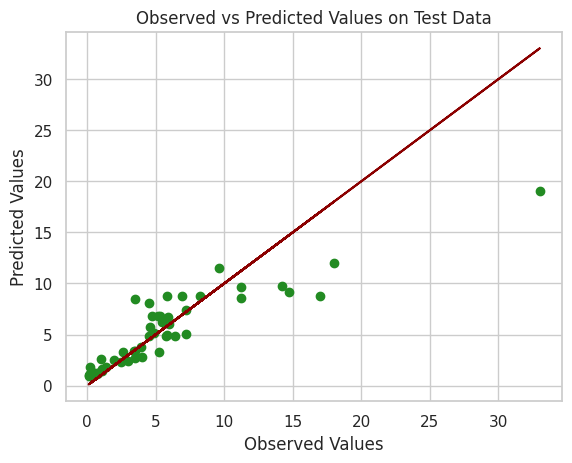

In [41]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

In [42]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is 0.0


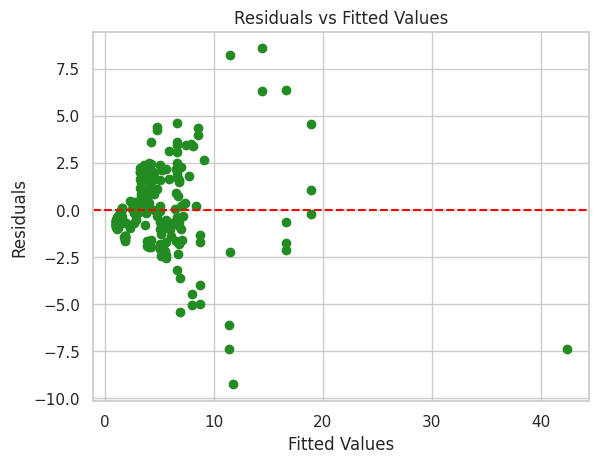

In [43]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


In [44]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and Present_Price: 0.0
Correlation between residuals and Fuel_Type_Encoded: 0.0
Correlation between residuals and Transmission_Encoded: 0.0


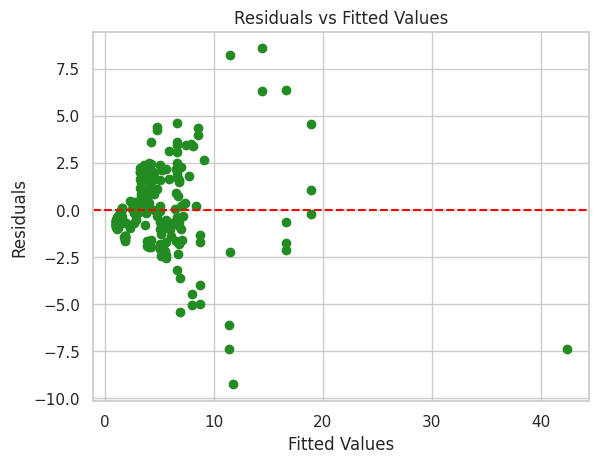

In [45]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Train/Test and Evaluation

**Scaling the data**

In [46]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 2.754041806424869


In [48]:
print(y_pred)
y_test

[[ 2.51145412]
 [ 8.78208269]
 [ 1.84875543]
 [ 7.37688464]
 [ 8.74992132]
 [ 1.05286998]
 [ 4.83436167]
 [ 8.51894319]
 [ 2.43018403]
 [ 6.84221304]
 [ 1.16408167]
 [ 3.40970241]
 [11.5088268 ]
 [ 1.06997947]
 [ 4.84262231]
 [ 8.09976065]
 [ 8.78208269]
 [ 4.84262231]
 [ 1.14269481]
 [ 9.76587845]
 [ 5.70015449]
 [ 2.30186285]
 [ 9.64389224]
 [ 1.12986269]
 [ 6.20916186]
 [ 1.22824227]
 [ 1.18119117]
 [ 5.19970187]
 [ 1.63459269]
 [ 1.17263642]
 [ 2.59700157]
 [ 1.83562921]
 [ 9.1306075 ]
 [ 5.03510409]
 [12.02240564]
 [ 1.14269481]
 [ 2.78948335]
 [ 2.71676801]
 [ 6.69900212]
 [ 1.02292837]
 [ 3.34554182]
 [ 3.26427174]
 [ 4.99262446]
 [ 1.271016  ]
 [ 3.81605283]
 [ 6.78232982]
 [ 1.22824227]
 [19.06296133]
 [ 1.24535176]
 [ 6.01240271]
 [ 1.22824227]
 [ 1.22396489]
 [ 1.15852109]
 [ 1.45066565]
 [ 3.25999436]
 [ 8.57882641]
 [ 1.19402328]
 [ 6.78232982]
 [ 8.79491481]
 [ 0.95876778]]


,Selling_Price
28,1.95
95,5.85
186,0.25
16,7.25
282,8.25
158,0.48
287,5.75
84,3.49
38,3.00
1,4.75


# Performing SHAP analysis

In [49]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.4 MB/s eta 0:00:00


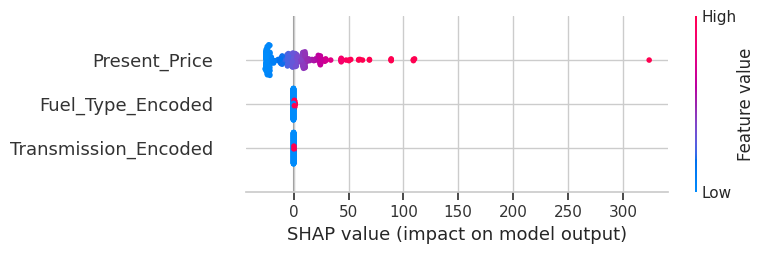

In [50]:
import shap
import pandas as pd

explainer = shap.LinearExplainer(lr, X )
shap_values = explainer(X)
shap.summary_plot(shap_values, X)


# Fitting a Tree model


In [51]:
car_df

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type_Encoded,Transmission_Encoded,Fuel_Type_Encoded
0,2014,3.35,5.59,27000,0,0,1
1,2013,4.75,9.54,43000,0,0,2
2,2017,7.25,9.85,6900,0,0,1
3,2011,2.85,4.15,5200,0,0,1
4,2014,4.60,6.87,42450,0,0,2
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,2
297,2015,4.00,5.90,60000,0,0,1
298,2009,3.35,11.00,87934,0,0,1
299,2017,11.50,12.50,9000,0,0,2


In [52]:
tree_df = car_df.copy()
tree_df

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type_Encoded,Transmission_Encoded,Fuel_Type_Encoded
0,2014,3.35,5.59,27000,0,0,1
1,2013,4.75,9.54,43000,0,0,2
2,2017,7.25,9.85,6900,0,0,1
3,2011,2.85,4.15,5200,0,0,1
4,2014,4.60,6.87,42450,0,0,2
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,2
297,2015,4.00,5.90,60000,0,0,1
298,2009,3.35,11.00,87934,0,0,1
299,2017,11.50,12.50,9000,0,0,2


In [53]:
from sklearn.tree import DecisionTreeRegressor

# Creating the decision tree regressor model
tree_regressor = DecisionTreeRegressor(random_state=1)


# Fitting the model with your predictor and target variables
tree_regressor.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [54]:
print("Making predictions for the following 5 records:")
print(X.head())
print("The predictions are")
print(tree_regressor.predict(X.head()))

Making predictions for the following 5 records:
   Present_Price  Fuel_Type_Encoded  Transmission_Encoded
0           5.59                  1                     0
1           9.54                  2                     0
2           9.85                  1                     0
3           4.15                  1                     0
4           6.87                  2                     0
The predictions are
[3.35 4.75 7.25 1.95 4.6 ]


In [55]:
#MAE
from sklearn.metrics import mean_absolute_error

predicted_app_temp = tree_regressor.predict(X)
mean_absolute_error(y, predicted_app_temp)

0.3774663162924033

In [56]:
# Training and testing split

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 0)
# Defining model
temp_model = DecisionTreeRegressor()
# Fit model
temp_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = temp_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

1.0284425925925926


In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  1
Max leaf nodes: 50  		 Mean Absolute Error:  1
Max leaf nodes: 500  		 Mean Absolute Error:  1
Max leaf nodes: 5000  		 Mean Absolute Error:  1


**Fitting a Random Forest**

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
temp_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, temp_preds))

<ipython-input-58-5b875369794c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(train_X, train_y)


1.0931994939921192


# SHAP Analysis on Tree Model


<ipython-input-59-3c181155598e>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


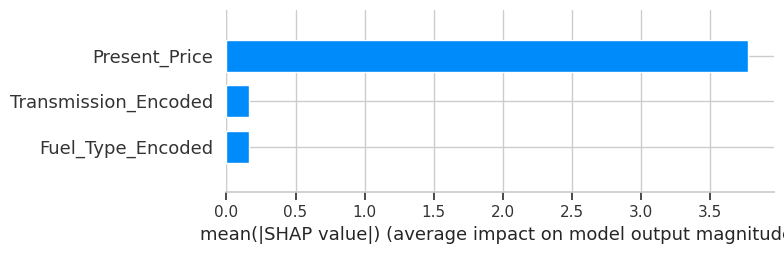

In [59]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Calculate SHAP values for the test data
explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


# Auto ML

In [60]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)


In [61]:
!pip install h2o

In [62]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o
import pandas as pd
from h2o.automl import H2OAutoML
import re
import matplotlib.pylab as plt
import numpy as np
# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 5 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_70olgf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.898 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Importing H2O AutoML

In [63]:
df = h2o.import_file('cardekho_data.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [64]:
car_csv = "/content/cardekho_data.csv"  # modify this for your machine
data=pd.read_csv("/content/cardekho_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##Observations:
* There are no missing values in any of the columns.
* The 'Owner' column has 290 zeros, indicating a large number of entries with zero owners.
* The 'Kms_Driven' column has a relatively high standard deviation, suggesting a wide range of values.
* The 'Year' column represents the year of the car and has a range from 2003 to 2018.
* The 'Selling_Price' and 'Present_Price' columns have a wide range of values, with the maximum significantly higher than the mean, indicating potential outliers.

In [65]:
print(data.columns[data.isna().any()])
data=data.dropna()

Index([], dtype='object')


##Data Preprocessing

In [66]:
data['Selling_Price'] = data['Selling_Price'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
data['Kms_Driven'] = data['Kms_Driven'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
data['Present_Price'] = data['Present_Price'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))

data['Selling_Price'] = pd.to_numeric(data['Selling_Price'])
data['Kms_Driven'] = pd.to_numeric(data['Kms_Driven'])
data['Present_Price'] = pd.to_numeric(data['Present_Price'])
data=data.dropna()

data_pd=data.copy()

data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


<ipython-input-67-aa8a01df75ad>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(data_pd.corr().corr())
<ipython-input-67-aa8a01df75ad>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_pd.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)


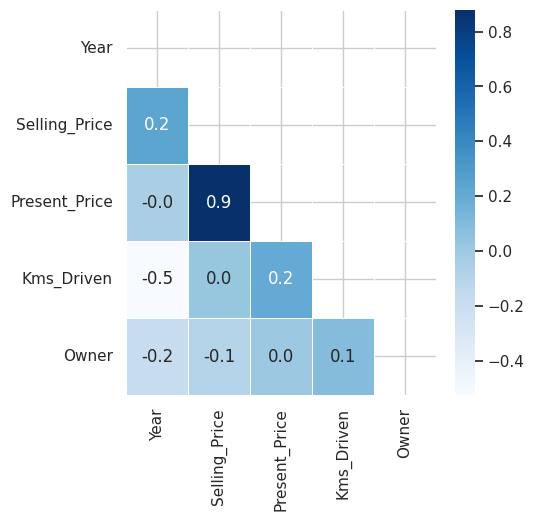

In [67]:
import seaborn as sns
f,ax = plt.subplots(figsize=(5, 5))
mask = np.zeros_like(data_pd.corr().corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_pd.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show()

Looking at the above correlation Heatmap, the inferences are:

* High Correlation: There is a strong positive correlation of 0.9 between 'Present_Price' and 'Selling_Price', suggesting that as the present price of a car increases, its selling price tends to increase as well.

* Moderate Correlation: 'Year' has a moderate positive correlation of 0.2 with 'Selling_Price', indicating that newer models might be associated with higher selling prices.

* Low Negative Correlation: 'Kms_Driven' has a low negative correlation of -0.5 with 'Year', which could mean that older cars tend to have higher mileage.

* Weak Correlations: The 'Owner' variable shows weak correlations with all other variables, suggesting that the number of owners does not strongly influence these variables.

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = data_pd.drop(columns={"Car_Name","Fuel_Type","Seller_Type","Transmission"})
# df_vif.drop(columns={'song_popularity','song_name'}, inplace = True)

X = df_vif.loc[:,df_vif.columns != 'Selling_Price']

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] =X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

         feature       VIF
0           Year  2.408884
1  Present_Price  1.858906
2     Kms_Driven  2.001950
3          Owner  1.038791


* Based on these VIF values, none of the features display high multicollinearity, and all are below common thresholds for concern.
* The data suggests that the model should not suffer from severe multicollinearity issues that could distort the regression coefficients or their interpretability.

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = data_pd.drop(columns={"Car_Name","Fuel_Type","Seller_Type"})
# df_vif.drop(columns={'song_popularity','song_name'}, inplace = True)

X = df_vif.loc[:,df_vif.columns != 'Transmission']

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] =X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = data_pd.drop(columns={"Car_Name","Transmission","Seller_Type"})
# df_vif.drop(columns={'song_popularity','song_name'}, inplace = True)

X = df_vif.loc[:,df_vif.columns != 'Fuel_Type']

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] =X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

         feature       VIF
0           Year  2.780556
1  Selling_Price  9.355028
2  Present_Price  9.339093
3     Kms_Driven  2.215973
4          Owner  1.074269
         feature       VIF
0           Year  2.780556
1  Selling_Price  9.355028
2  Present_Price  9.339093
3     Kms_Driven  2.215973
4          Owner  1.074269


* Looking at the above Variance Inflation Factor, wrt Transmission, Fuel Type the inferences are:
Year is  multi-colinear .
* Sellin_Price and Kilometers_Driven are not multi-collinear.

##Regression using AutoML h2o
Target variable as `Selling_Price`

In [70]:
y = "Selling_Price"
x = data.columns

In [71]:
import statsmodels.formula.api as smf
var = smf.ols(formula="Selling_Price ~ Car_Name + Year + Present_Price + Kms_Driven + Fuel_Type +  Seller_Type +  Transmission + Owner ", data=data_pd).fit()
var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     31.51
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           9.40e-84
Time:                        01:33:06   Log-Likelihood:                -481.25
No. Observations:                 301   AIC:                             1174.
Df Residuals:                     195   BIC:                             1567.
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -1204.9184    114.494    -10.524      0.000   -1430.724    -979.112
Car_Name[T.Activa 3g]                    -4.1987      2.078     -2.021      0.045      -8.297      -0.100
Car_Name[T.Activa 4g]                    -8.2505      2.284     -3.612      0.000     -12.756      -3.745
Car_Name[T.Bajaj  ct 100]                -6.6749      2.198     -3.036      0.003     -11.011      -2.339
Car_Name[T.Bajaj Avenger 150]            -7.1128      2.208     -3.221      0.001     -11.468      -2.758
Car_Name[T.Bajaj Avenger 150 street]     -7.2029      2.208     -3.262      0.001     -11.557      -2.849
Car_Name[T.Bajaj Avenger 220]            -7.5845      1.855     -4.090      0.000     -11.242      -3.927
Car_Name[T.Bajaj Avenger 220 dtsi]       -5.2521      1.891     -2.778      0.006      -8.981      -1.523
Car_Name[T.Bajaj Avenger Street 220]     -4.4151      2.150     -2.053      0.041      -8.656      -0.175
Car_Name[T.Bajaj Discover 100]           -5.5338      2.173     -2.547      0.012      -9.819      -1.249
Car_Name[T.Bajaj Discover 125]           -5.0151      2.041     -2.457      0.015      -9.041      -0.989
Car_Name[T.Bajaj Dominar 400]            -7.5035      2.216     -3.386      0.001     -11.874      -3.133
Car_Name[T.Bajaj Pulsar  NS 200]         -6.0873      2.179     -2.793      0.006     -10.385      -1.789
Car_Name[T.Bajaj Pulsar 135 LS]          -6.1369      2.183     -2.811      0.005     -10.443      -1.831
Car_Name[T.Bajaj Pulsar 150]             -3.3633      1.715     -1.961      0.051      -6.746       0.020
Car_Name[T.Bajaj Pulsar 220 F]           -5.4984      1.895     -2.901      0.004      -9.236      -1.760
Car_Name[T.Bajaj Pulsar NS 200]          -5.2058      1.788     -2.912      0.004      -8.732      -1.680
Car_Name[T.Bajaj Pulsar RS200]           -7.0849      2.204     -3.214      0.002     -11.432      -2.738
Car_Name[T.Hero  CBZ Xtreme]             -2.6474      2.127     -1.245      0.215      -6.842       1.548
Car_Name[T.Hero  Ignitor Disc]           -5.9659      2.313     -2.580      0.011     -10.527      -1.405
Car_Name[T.Hero Extreme]                 -5.7131      1.905     -2.999      0.003      -9.470      -1.956
Car_Name[T.Hero Glamour]                 -5.6254      2.172     -2.590      0.010      -9.909      -1.341
Car_Name[T.Hero Honda CBZ extreme]       -4.1558      2.148     -1.935      0.054      -8.392       0.080
Car_Name[T.Hero Honda Passion Pro]       -4.7459      2.160     -2.197      0.029      -9.005      -0.486
Car_Name[T.Hero Hunk]                    -2.3012      2.259     -1.019      0.310      -6.757       2.154
Car_Name[T.Hero Passion Pro]             -7.0071      1.937     -3.618      0.000     -10.827      -3.187
Car_Name[

**Points to be Noted**


For Regression of transmission the following are significant variables as its P(t) value is less than 0.05:

In [72]:
target=y
data=h2o.deep_copy(df, 'data')

splits = data.split_frame(ratios=[0.7, 0.15], seed=1)

train = splits[0]
valid = splits[1]
test = splits[2]

print ("Rows in Train",train.nrow)
print ("Rows in Validation",valid.nrow)
print ("Rows in Test",test.nrow)

Rows in Train 216
Rows in Validation 45
Rows in Test 40


In [73]:
aml = H2OAutoML(max_models =10,max_runtime_secs_per_model=30,exclude_algos=['DeepLearning','DRF'],
                balance_classes=True,	seed =1)
aml.train(training_frame = train, y = y)

lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |█
01:33:13.10: GBM_1_AutoML_2_20240318_13307 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_2_20240318_13307.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 172.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 173.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 173.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 173.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 173.0.


█████████████████████████████████████████

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20240318_13307,0.804084,0.646551,0.540086,nan,0.646551
StackedEnsemble_BestOfFamily_1_AutoML_2_20240318_13307,0.815169,0.6645,0.534876,nan,0.6645
XGBoost_grid_1_AutoML_2_20240318_13307_model_2,0.910514,0.829036,0.587082,0.152126,0.829036
XGBoost_2_AutoML_2_20240318_13307,0.994265,0.988563,0.641087,nan,0.988563
XGBoost_3_AutoML_2_20240318_13307,1.01553,1.03131,0.642501,0.164073,1.03131
GBM_5_AutoML_2_20240318_13307,1.03245,1.06596,0.625636,0.158683,1.06596
XGBoost_grid_1_AutoML_2_20240318_13307_model_1,1.10684,1.2251,0.68483,nan,1.2251
XGBoost_1_AutoML_2_20240318_13307,1.14939,1.3211,0.76522,nan,1.3211
GBM_3_AutoML_2_20240318_13307,1.51247,2.28756,0.802842,nan,2.28756
GBM_2_AutoML_2_20240318_13307,1.53228,2.34788,0.837446,nan,2.34788


In [74]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20240318_13307


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  5/10
# GBM base models (used / total)      1/4
# XGBoost base models (used / total)  4/5
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.08804906310194961
RMSE: 0.29673062380204307
MAE: 0.20681869132378664
RMSLE: 0.08626152230227385
Mean Residual Deviance: 0.08804906310194961
R^2: 0.9956584693279102
Null degrees of freedom: 215
Residual degrees of freedom: 210
Null devianc

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_5_AutoML_2_20240318_13307,0.071262,0.00507827,0.0478285,0.012701,0.00507827,156,0.026501,GBM
XGBoost_grid_1_AutoML_2_20240318_13307_model_2,0.186406,0.0347472,0.113262,0.0292213,0.0347472,465,0.015405,XGBoost
XGBoost_3_AutoML_2_20240318_13307,0.198581,0.0394346,0.146499,0.0441174,0.0394346,350,0.009085,XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_2_20240318_13307,0.252816,0.063916,0.176228,0.0739563,0.063916,544,0.071689,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20240318_13307,0.296731,0.0880491,0.206819,0.0862615,0.0880491,646,0.110217,StackedEnsemble
XGBoost_2_AutoML_2_20240318_13307,0.324986,0.105616,0.184179,0.0643015,0.105616,436,0.010687,XGBoost
XGBoost_grid_1_AutoML_2_20240318_13307_model_1,0.354033,0.125339,0.247408,0.0893655,0.125339,1036,0.010591,XGBoost
GBM_3_AutoML_2_20240318_13307,0.387258,0.149969,0.186227,0.0670688,0.149969,286,0.03856,GBM
GBM_4_AutoML_2_20240318_13307,0.409693,0.167849,0.195387,0.0723668,0.167849,269,0.066352,GBM
GBM_2_AutoML_2_20240318_13307,0.486454,0.236638,0.236822,0.0822884,0.236638,356,0.031548,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

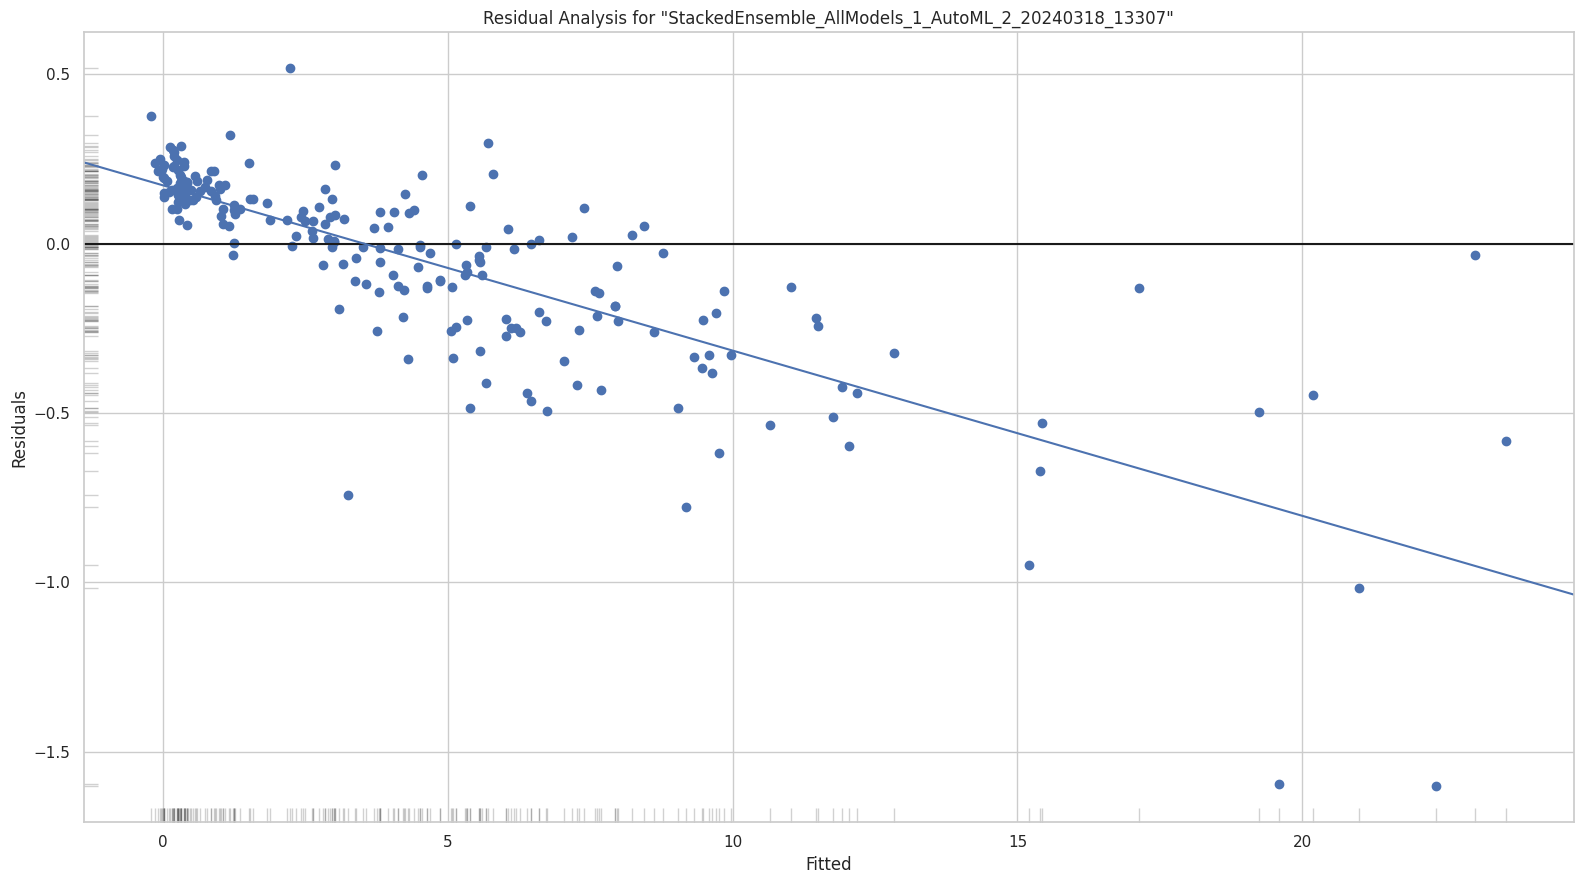

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

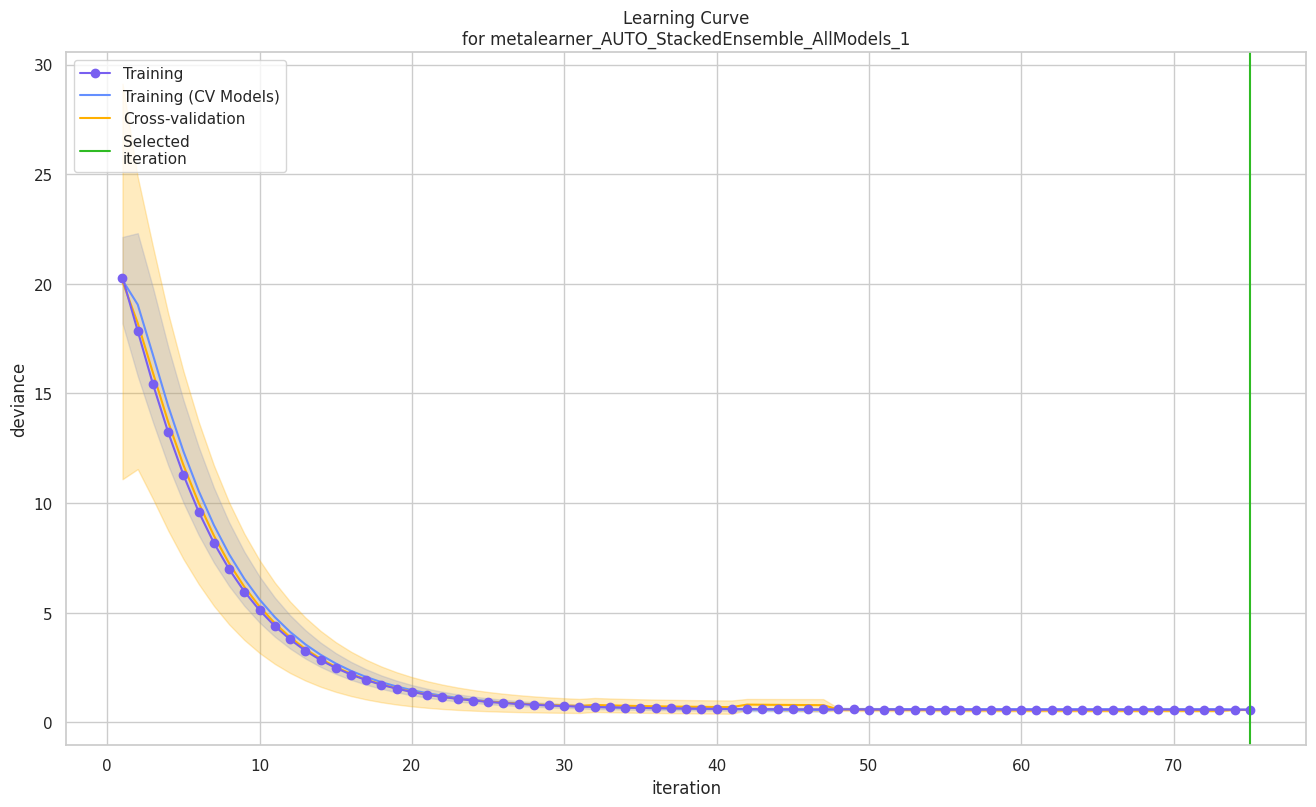

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

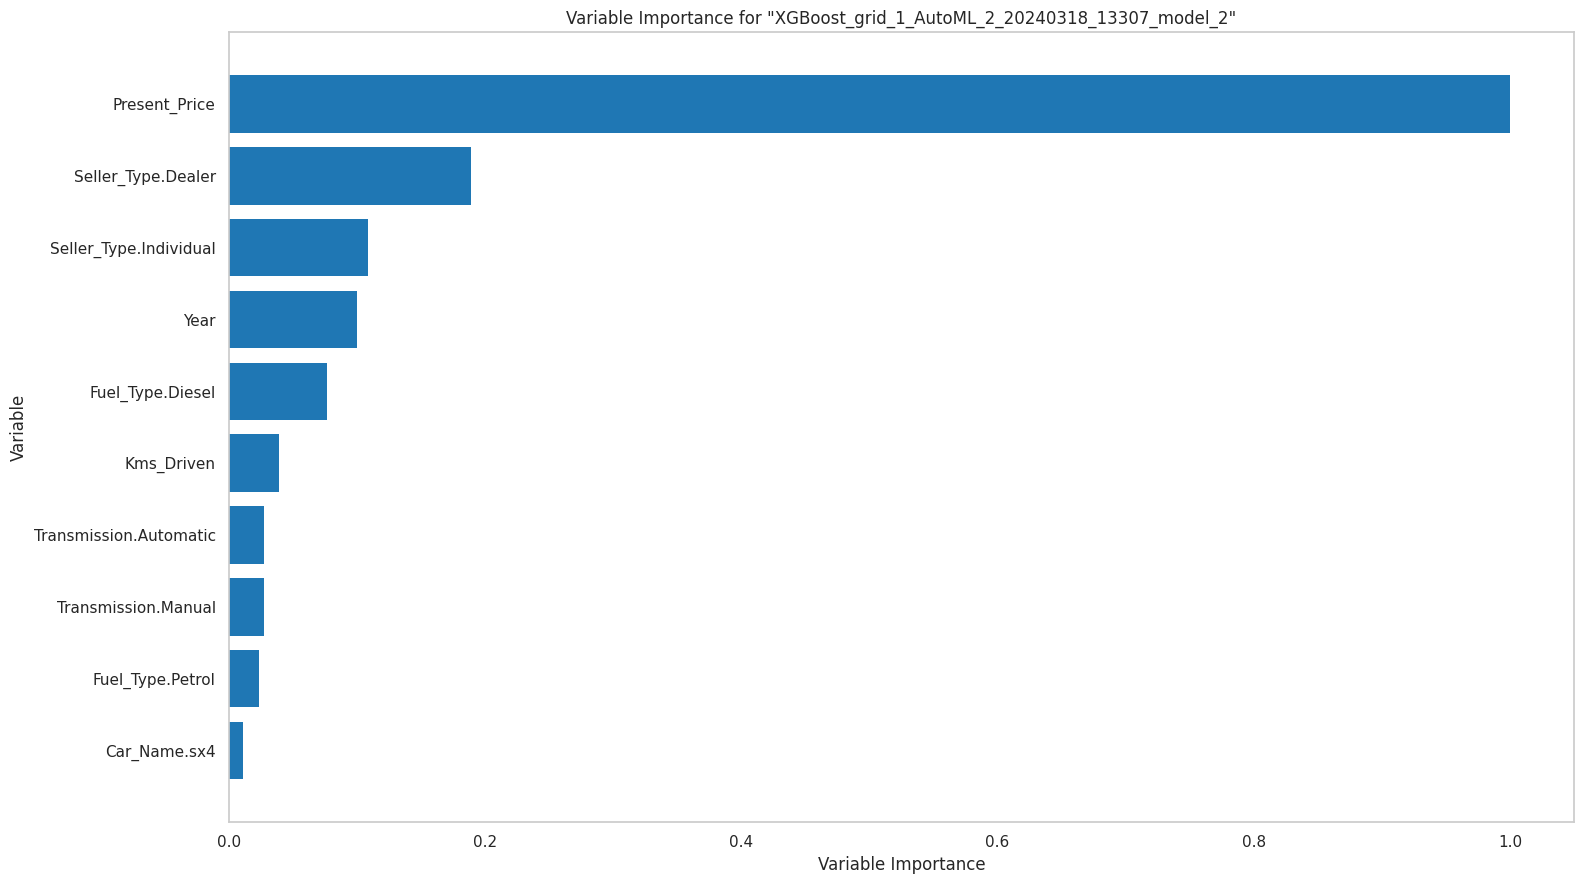

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

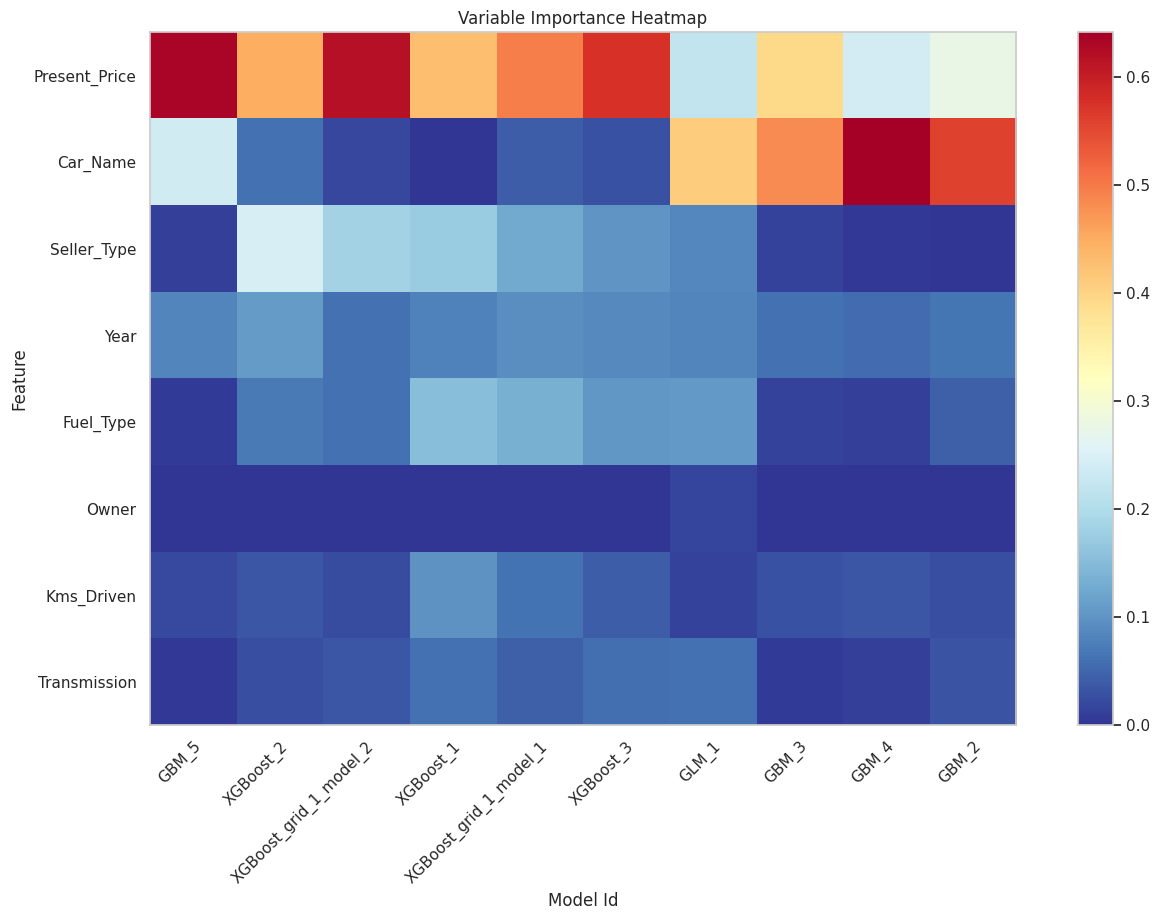

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

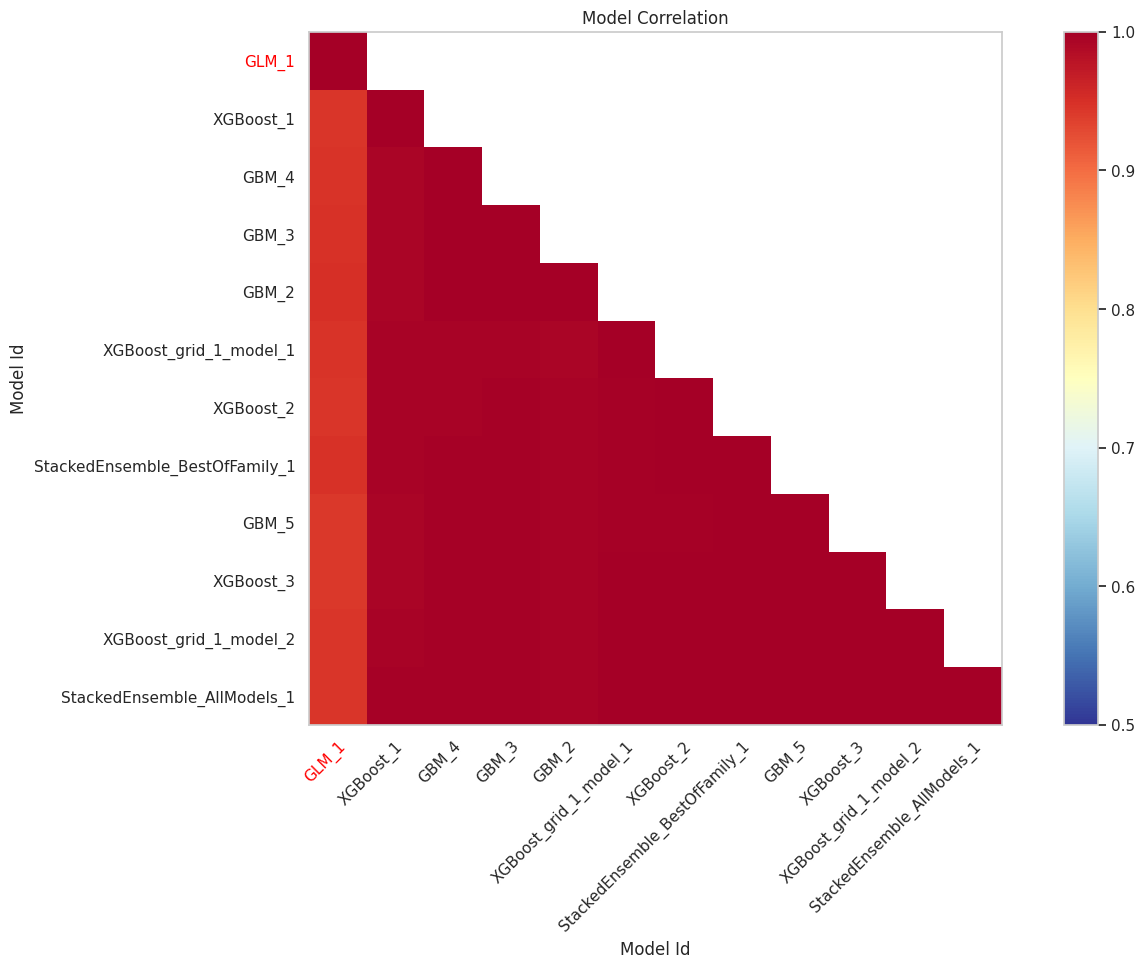

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

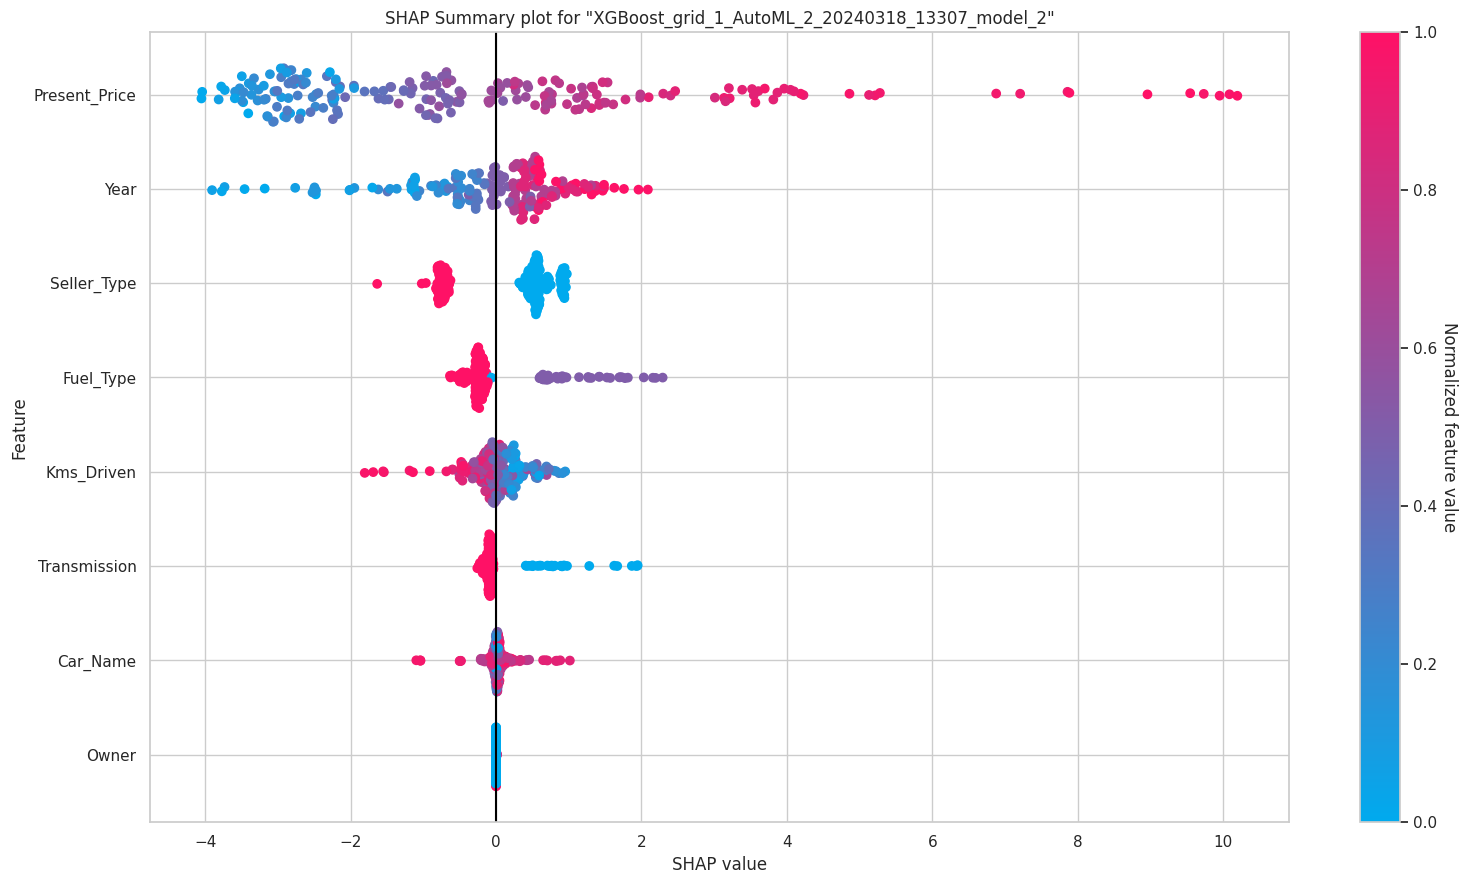

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

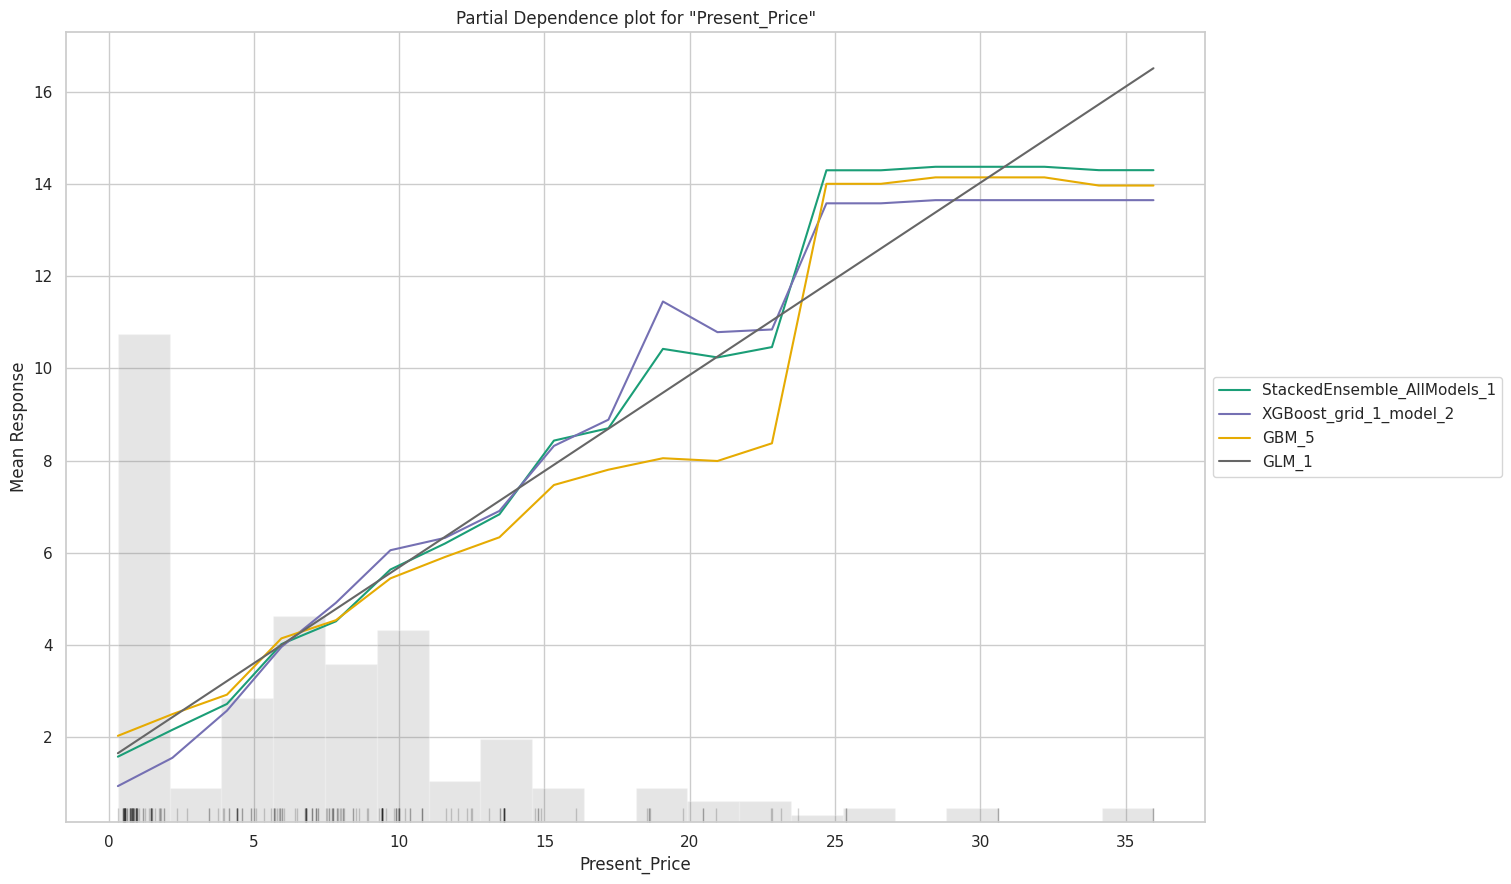

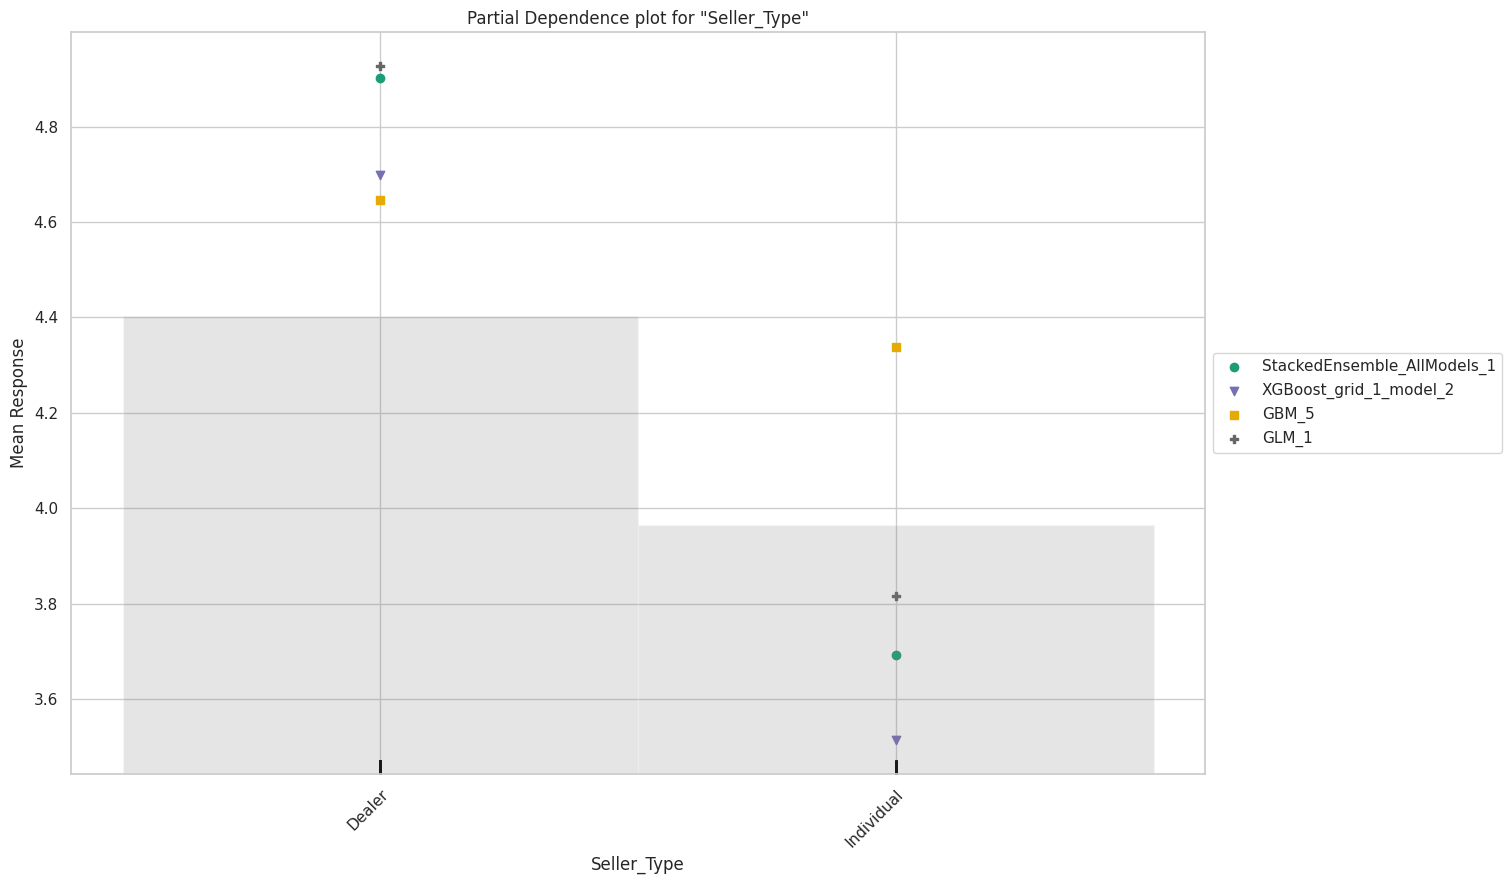

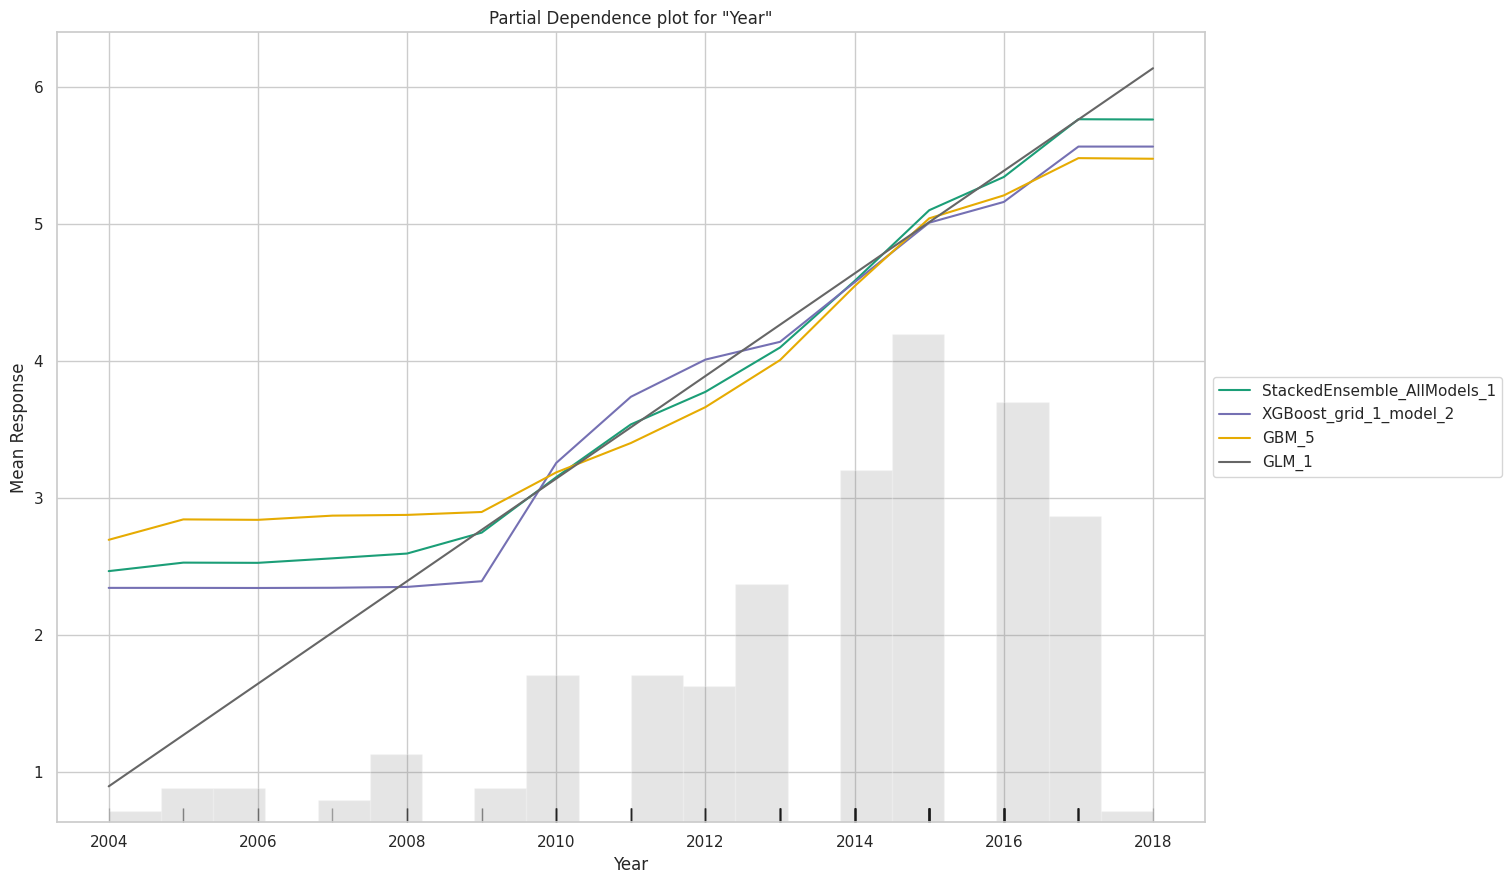

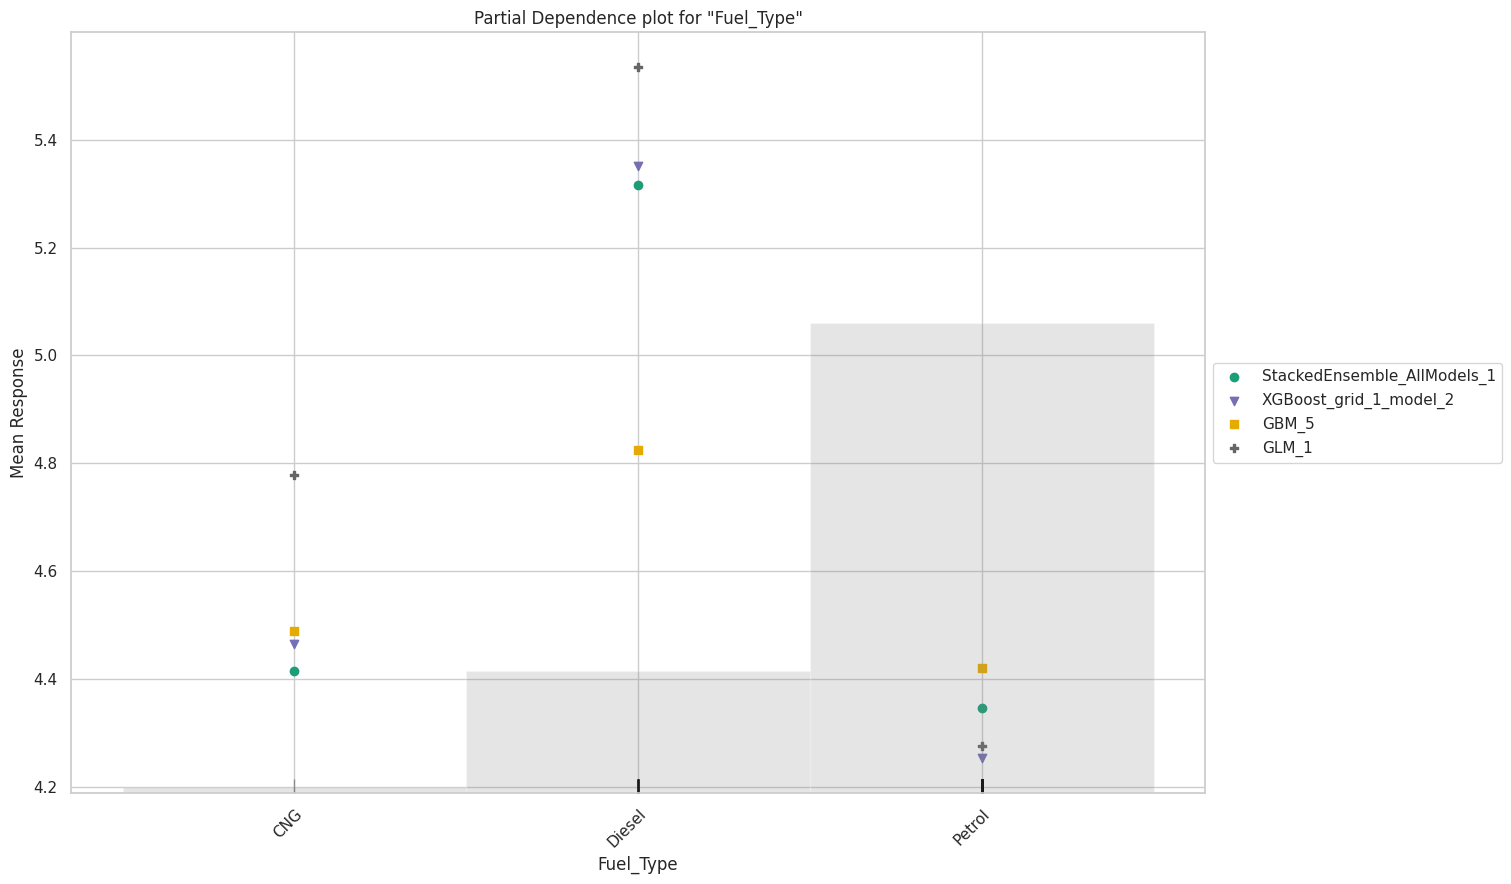

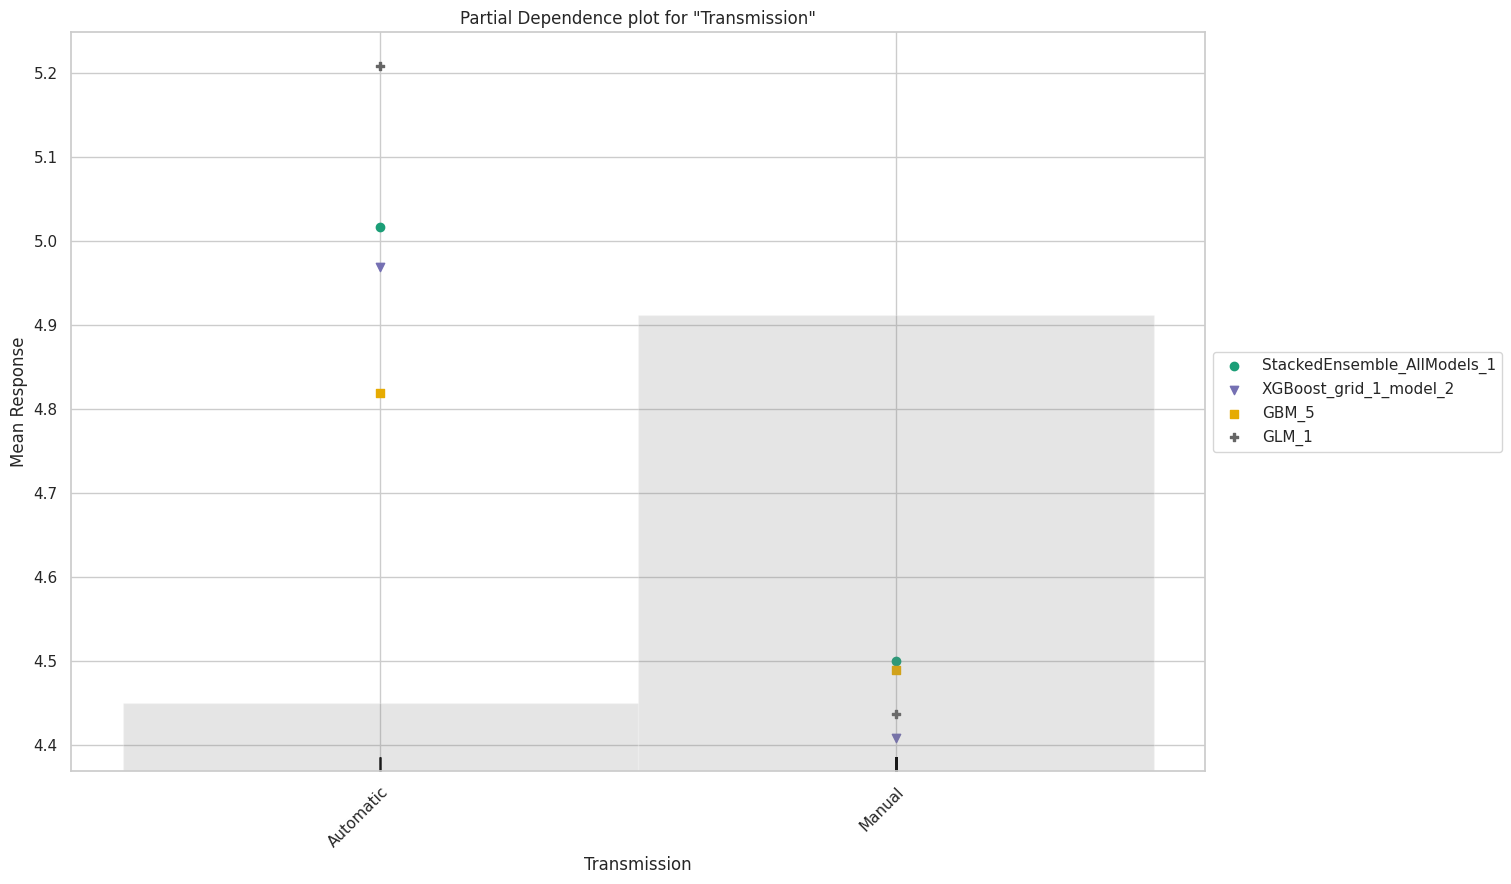

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

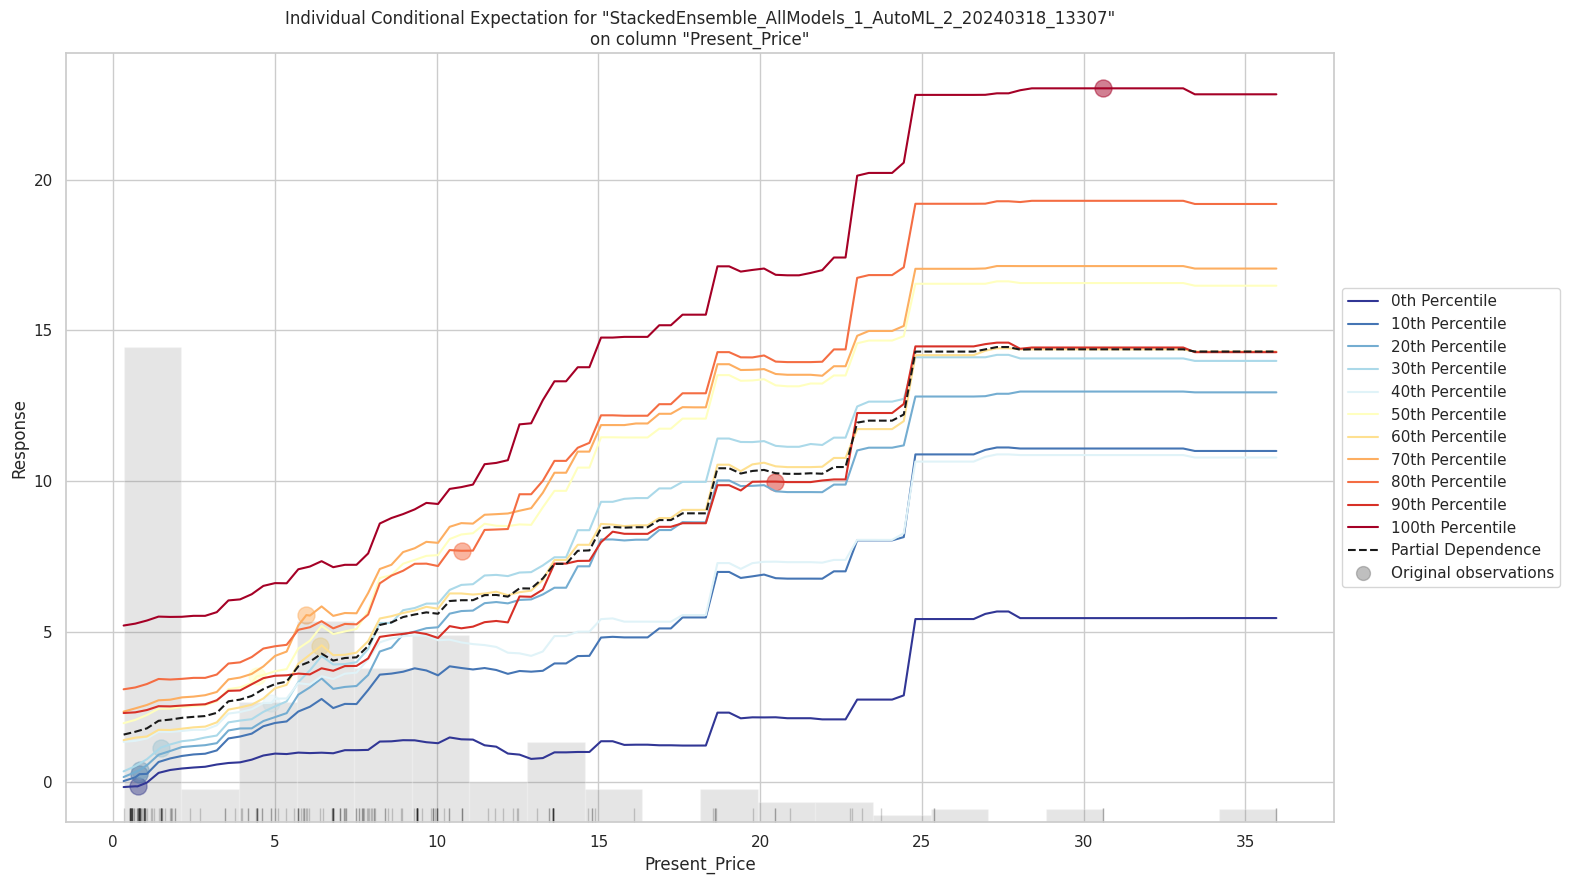

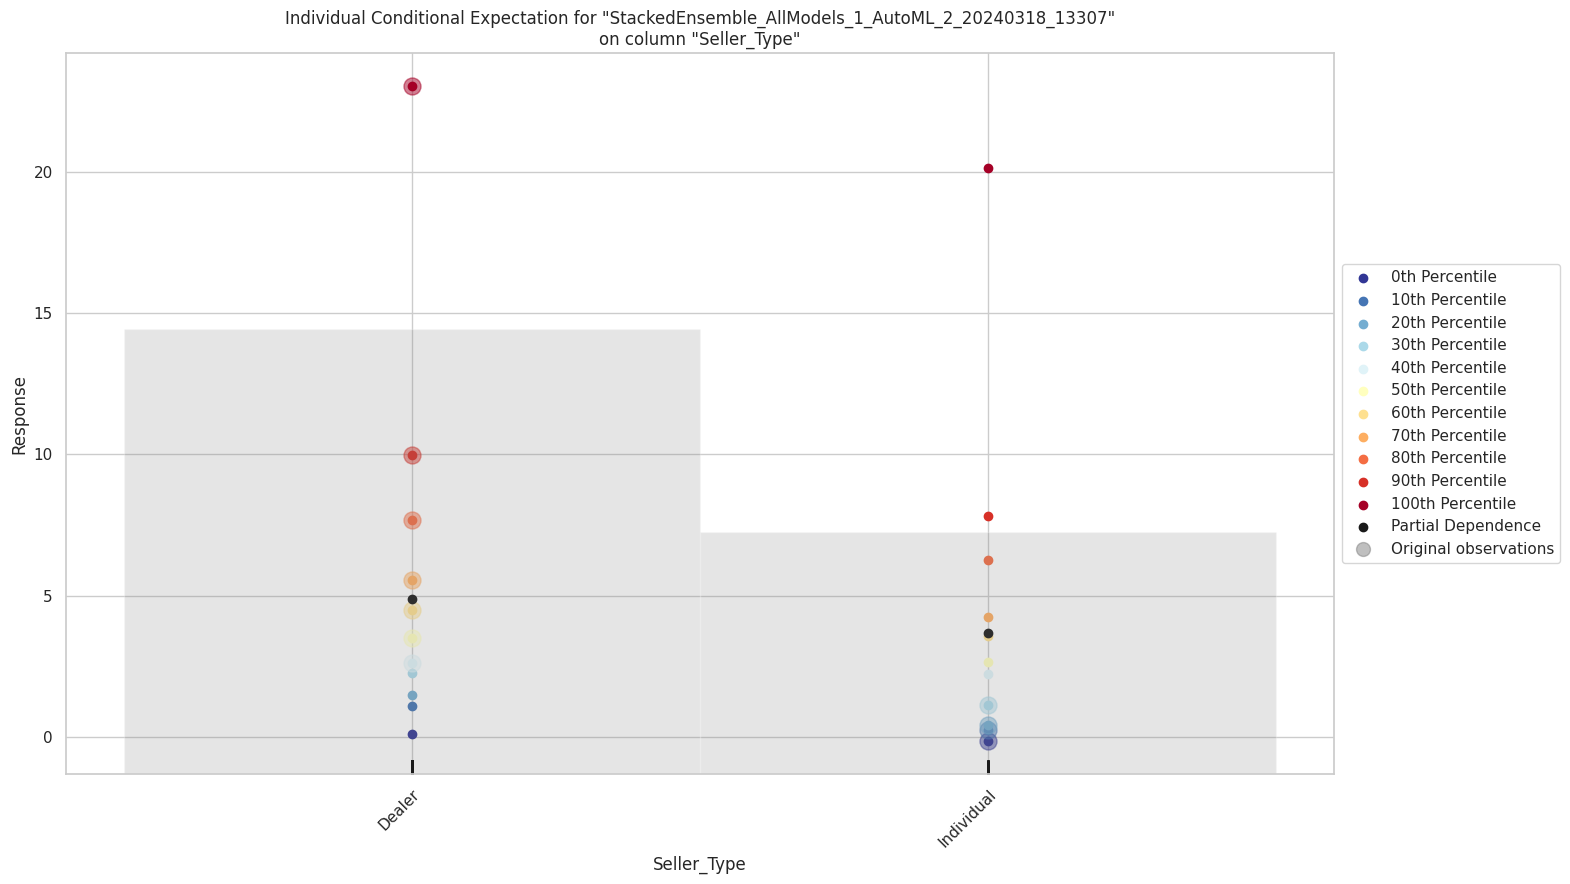

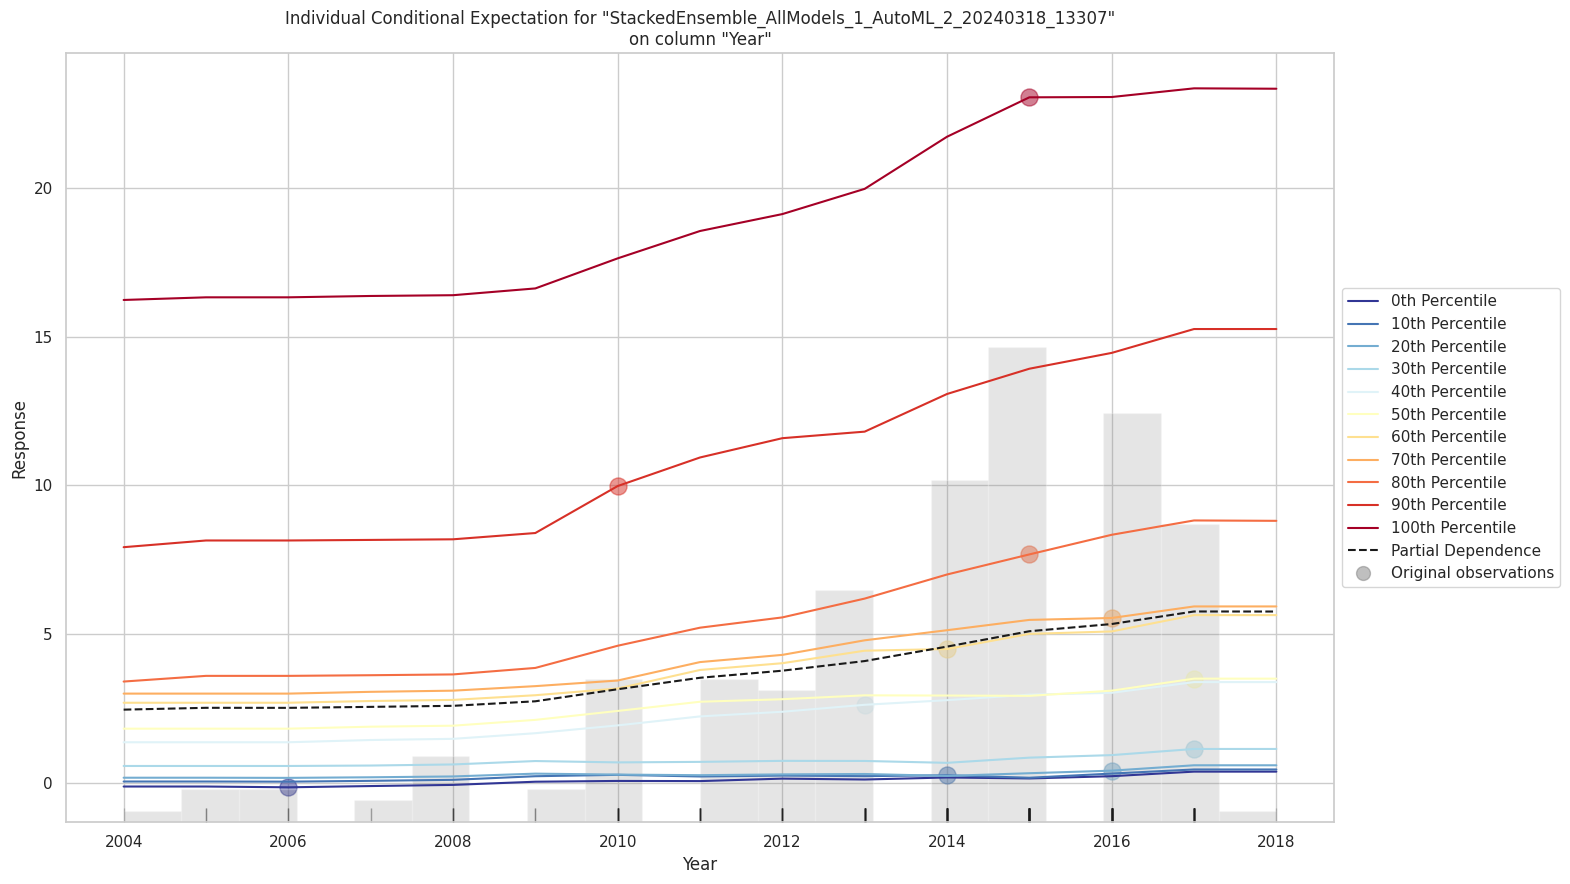

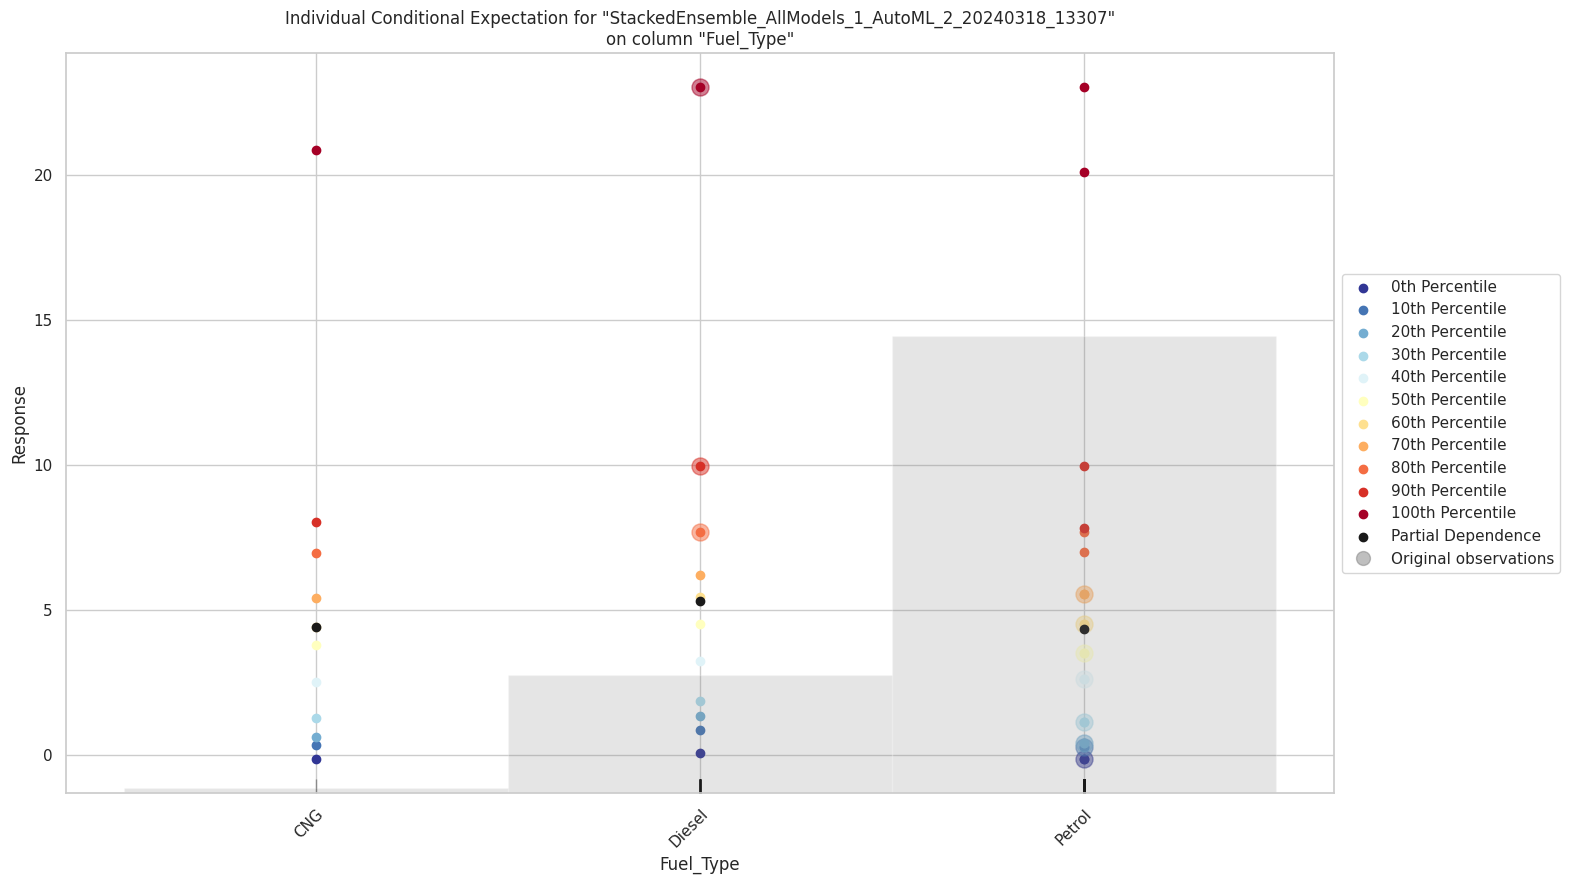

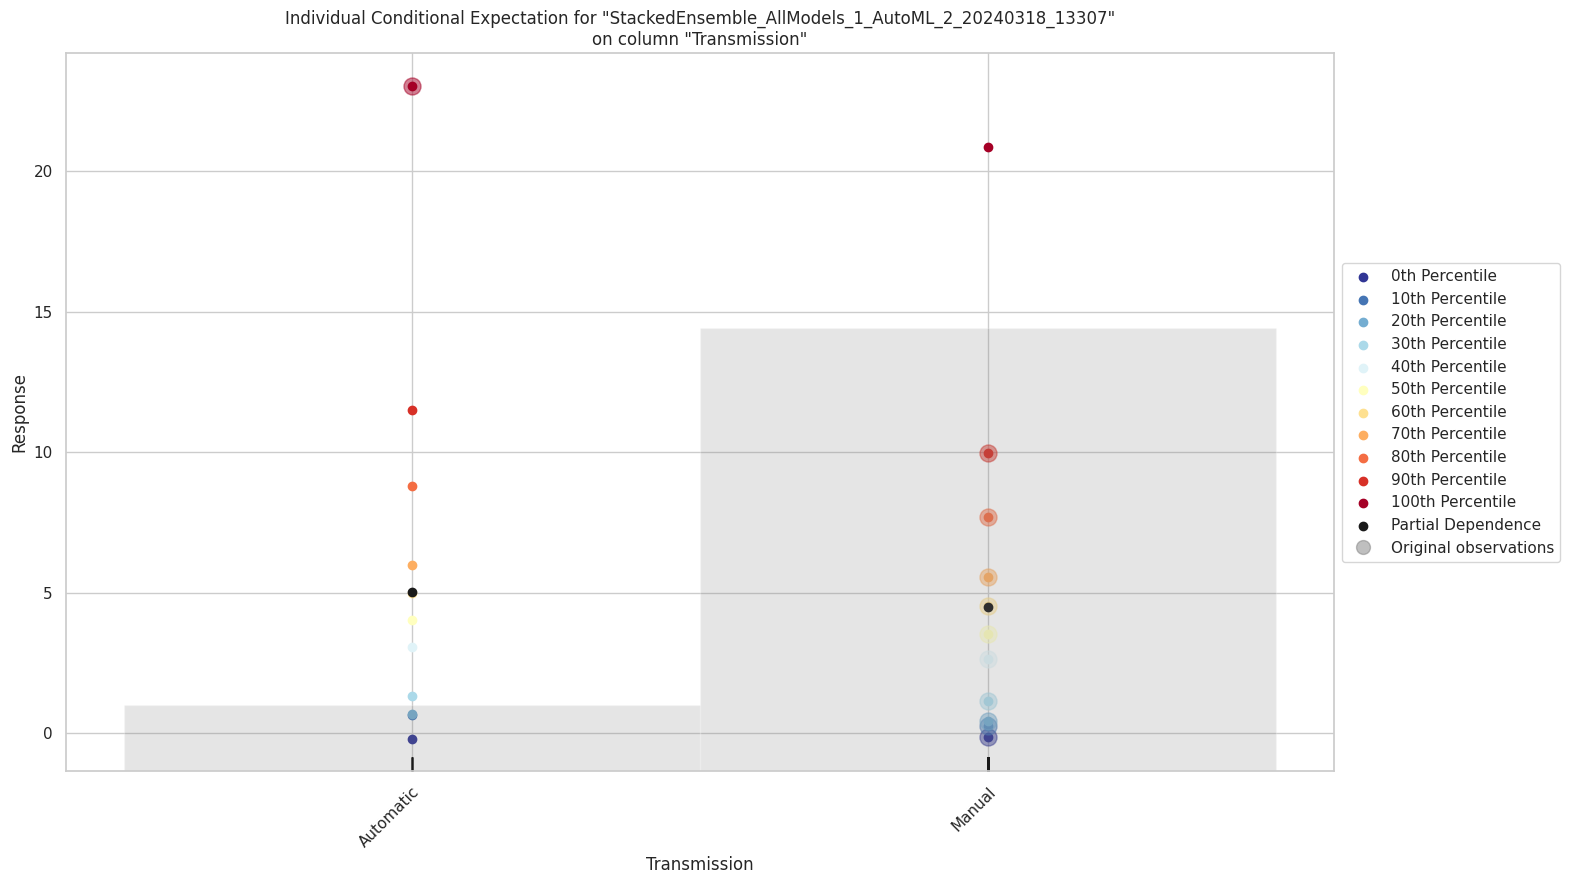

In [75]:
exa = aml.explain(train)

MIT License

Copyright (c) 2024 shivanagireddy

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.